# Import Libraries

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip3 install xgboost

# Load the Dataset

This dataset was acquired from Kaggle. It has 23 features consisting of customer profile and credit card usage.


In [311]:
train = pd.read_csv('BankChurners.csv')

In [312]:
train.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Data Cleaning
Before we analyze the dataset, we have to ensure that our data is clean from duplicates and has the correct data type.

# Duplicates
Let's chech whether our dataset has a duplicate or not. As we can see in the picture below, we don't have any duplicates.

In [313]:
train.duplicated().sum()

0

# Useless Features
Not all features are helpfulin analysis which is why we will remove these useless features to simplify our next step.

In [314]:
train.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1,inplace=True)

In [315]:
train.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Eploratory Data Analysis (EDA)
Before going to the machine learning section I will like to do a little bit of EDA first. EDA is a good start for analytics, it helps us discover patterns, check assumptions, and spot weird data points like outliers

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

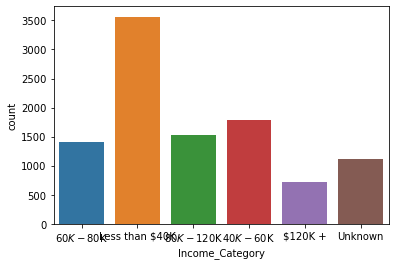

In [316]:
sns.countplot(x="Income_Category",data=train)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

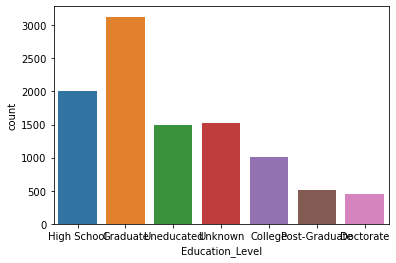

In [317]:
sns.countplot(x="Education_Level",data=train)

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='count'>

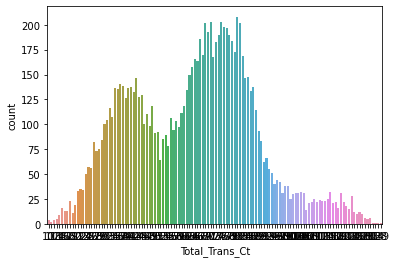

In [318]:
sns.countplot(x="Total_Trans_Ct",data=train)

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

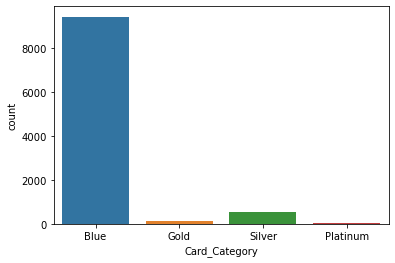

In [319]:
sns.countplot(x="Card_Category",data=train)

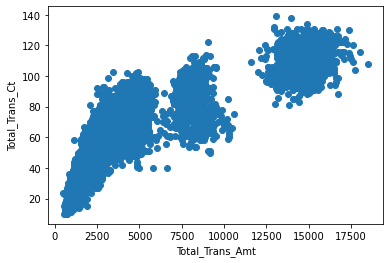

In [320]:
plt.scatter(train["Total_Trans_Amt"],train["Total_Trans_Ct"])
plt.xlabel("Total_Trans_Amt")
plt.ylabel("Total_Trans_Ct")
plt.show()

# Data Preprocessing for Machine Learning
Befor we create a machine learning modek, first we have to preprocess the data. Preprocessing data is done so that the machine can read our data correctly.

# Feature Encoding


In [321]:
mapAttrition = {"Attrited Customer":1,"Existing Customer":0}
mapGender = {"M":1,"F":0}
maoCard = {"Blue":0,"Silver":1,"Gold":2,"Platinum":3}


In [322]:
train[["Attrition_Flag","Gender","Card_Category"]].sample(5)

,Attrition_Flag,Gender,Card_Category
6736,Existing Customer,F,Blue
5307,Existing Customer,M,Blue
5437,Attrited Customer,M,Blue
6568,Existing Customer,F,Blue
5570,Existing Customer,F,Blue


# Data Visualization


<AxesSubplot:xlabel='Dependent_count', ylabel='Customer_Age'>

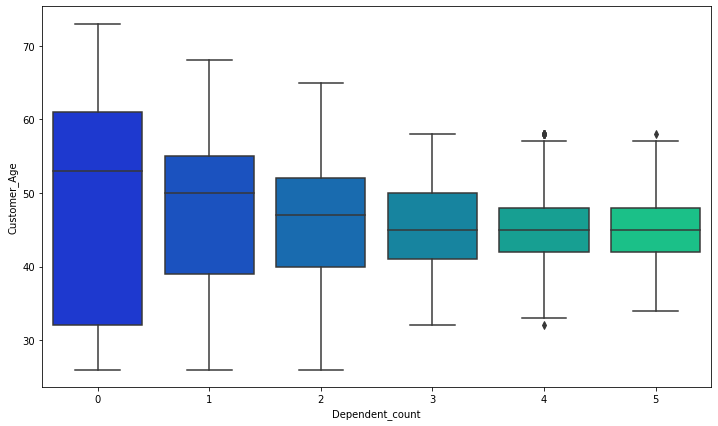

In [323]:
plt.figure(figsize=(12,7))
sns.boxplot(y="Customer_Age",x="Dependent_count",data=train,palette="winter")

<AxesSubplot:>

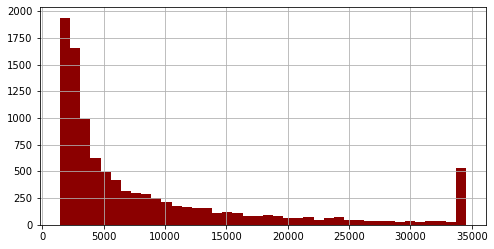

In [324]:
train["Credit_Limit"].hist(bins=40,color="darkred",figsize=(8,4))

<AxesSubplot:>

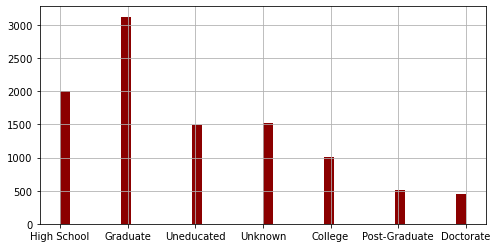

In [325]:
train["Education_Level"].hist(bins=40,color="darkred",figsize=(8,4))

<AxesSubplot:>

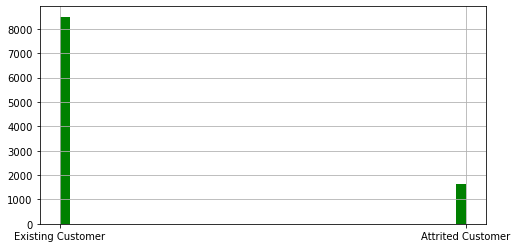

In [326]:
train["Attrition_Flag"].hist(bins=40,color="green",figsize=(8,4))

# Model Development
Our data has already been preprocessed, which means now we can start our machine leaning model development.

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train Test Split
To make sure our data is not overfitting we will use a simple train test split with an 80:20 ratio.
Building a Logistic Regression model
To prevent overfitting we will use train test split with a ratio of 80:20, we will use `stratify` to make sure the ratio of the target is maintaned.

In [327]:
from sklearn.model_selection import train_test_split

In [328]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Customer_Age",axis=1), 
                                                    train["Customer_Age"], test_size=0.30, 
                                                    random_state=101)

# Standardizing and Oversampling with SMOTE

The features was standardized using StandardScaler
Because the target is imbalanced I used SMOTE to oversampled the minority target so that the class is a little bit more balance with a ratio of 0.5

# Fitting and Evaluation
There are several algorithm that were used and this is the result of all the algorithm using default parameter:
I used Recall and AUC score to evaluate the models. 

# Training and Predicting

In [329]:
from sklearn.linear_model import LogisticRegression

# Evaluation

In [330]:
from sklearn.metrics import classification_report

In [331]:
print(classification_report)

<function classification_report at 0x000001FF938731F0>
